## 载入数据 

In [7]:
from keras.datasets import mnist
(X0, Y0), (X1, Y1) = mnist.load_data() 

## 数据展示

<Figure size 432x288 with 0 Axes>

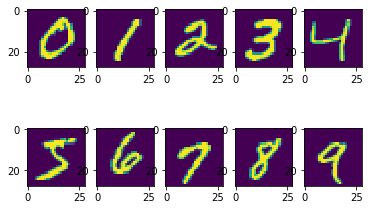

In [8]:
from matplotlib import pyplot as plt
plt.figure()
fig,ax = plt.subplots(2,5)
ax=ax.flatten()
for i in range(10):
    Im=X0[Y0==i][0]
    ax[i].imshow(Im)
plt.show()

## 数据处理

In [9]:
from keras.utils import np_utils
N0=X0.shape[0];N1=X1.shape[0]
print([N0,N1])
X0 = X0.reshape(N0,28,28,1)/255
X1 = X1.reshape(N1,28,28,1)/255
YY0 = np_utils.to_categorical(Y0)
YY1 = np_utils.to_categorical(Y1)
YY1

[60000, 10000]


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## 构建LeNet-5模型

In [10]:
from keras.layers import Conv2D,Dense,Flatten,Input,MaxPooling2D 
from keras import Model

input_layer = Input([28,28,1])
x = input_layer
x = Conv2D(6,[5,5],padding = "same", activation = 'relu')(x) 
x = MaxPooling2D(pool_size = [2,2], strides = [2,2])(x)    
x = Conv2D(16,[5,5],padding = "valid", activation = 'relu')(x) 
x = MaxPooling2D(pool_size = [2,2], strides = [2,2])(x)
x = Flatten()(x)   
x = Dense(120,activation = 'relu')(x)
x = Dense(84,activation = 'relu')(x)
x = Dense(10,activation = 'softmax')(x)
output_layer=x
model=Model(input_layer,output_layer)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               4812

In [11]:
model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])
model.fit(X0,YY0,epochs = 10,batch_size = 200,validation_data=[X1,YY1]) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.3901 - accuracy: 0.8858 - val_loss: 0.1267 - val_accuracy: 0.9628
Epoch 2/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.1068 - accuracy: 0.9675 - val_loss: 0.0674 - val_accuracy: 0.9779
Epoch 3/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0734 - accuracy: 0.9772 - val_loss: 0.0608 - val_accuracy: 0.9809
Epoch 4/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0591 - accuracy: 0.9819 - val_loss: 0.0538 - val_accuracy: 0.9821
Epoch 5/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0482 - accuracy: 0.9847 - val_loss: 0.0439 - val_accuracy: 0.9864
Epoch 6/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.0411 - accuracy: 0.9872 - val_loss: 0.0369 - val_accuracy: 0.9882
Epoch 7/10
60000/60000 [==============================] - 1s 20us/st